In [17]:
%load_ext autoreload
%autoreload 2
import torch
import numpy as np
from pathlib import Path
import jutils
from model import Diffusion
from scheduler import DDIMScheduler, DDPMScheduler
from network import UNet
from torchvision.transforms.functional import to_pil_image, to_tensor
from dataset import AFHQDataset, AFHQDataModule

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [64]:
device = "cuda:0"
net = UNet(1000, ch=128, ch_mult=[1,2,2,2], attn=[1], num_res_blocks=4, dropout=0.1)
var_scheduler = DDIMScheduler(1000, 1e-4, 0.02, "linear")
var_scheduler.set_timesteps(20)
model = Diffusion(net, var_scheduler)
ckpt = torch.load("./results/afhq-diffusion-07-03-135512/last.ckpt", map_location="cpu")
model.load_state_dict(ckpt)

model.eval()
model = model.to(device)
for p in model.parameters(): p.requires_grad_(False)

In [60]:
len(train_ds)

14630

In [18]:
dm = AFHQDataModule("./data")
train_dl = dm.train_dataloader()
img, label = next(iter(train_dl))

In [62]:
samples = model.sample(4,)

In [51]:
from dataset import tensor_to_pil_image

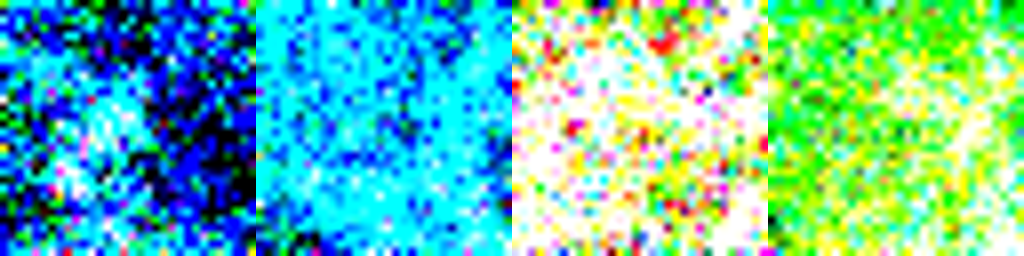

In [65]:
samples2 = tensor_to_pil_image(samples)
# imgs = [to_pil_image(samples2[i]).resize((256,256)) for i in range(len(samples2))]
imgs = [x.resize((256,256)) for x in samples2]
jutils.imageutil.merge_images(imgs)

In [23]:
root = "data/afhq/train/"
import random
import os

domains = os.listdir(root)
fnames, fnames2, labels = [], [], []
for idx, domain in enumerate(sorted(domains)):
    class_dir = os.path.join(root, domain)
    cls_fnames = os.listdir(class_dir)
    fnames += cls_fnames
    fnames2 += random.sample(cls_fnames, len(cls_fnames))
    labels += [idx] * len(cls_fnames)
